In [9]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import tensorflow_datasets as tfds
from tensorflow.keras import layers, models


In [10]:
(ds_train, ds_test), ds_info = tfds.load(
    'emnist/letters',
    split=['train', 'test'],
    as_supervised=True,
    with_info=True
)

print(ds_info)


Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

Extraction completed...: 0 file [00:00, ? file/s]

Generating splits...:   0%|          | 0/2 [00:00<?, ? splits/s]

Generating train examples...: 0 examples [00:00, ? examples/s]

Shuffling /root/tensorflow_datasets/emnist/letters/incomplete.NZ4IH3_3.1.0/emnist-train.tfrecord*...:   0%|   …

Generating test examples...: 0 examples [00:00, ? examples/s]

Shuffling /root/tensorflow_datasets/emnist/letters/incomplete.NZ4IH3_3.1.0/emnist-test.tfrecord*...:   0%|    …

Dataset emnist downloaded and prepared to /root/tensorflow_datasets/emnist/letters/3.1.0. Subsequent calls will reuse this data.
tfds.core.DatasetInfo(
    name='emnist',
    full_name='emnist/letters/3.1.0',
    description="""
    The EMNIST dataset is a set of handwritten character digits derived from the NIST Special Database 19 and converted to a 28x28 pixel image format and dataset structure that directly matches the MNIST dataset.
    
    Note: Like the original EMNIST data, images provided here are inverted horizontally and rotated 90 anti-clockwise. You can use `tf.transpose` within `ds.map` to convert the images to a human-friendlier format.
    """,
    config_description="""
    EMNIST Letters
    """,
    homepage='https://www.nist.gov/itl/products-and-services/emnist-dataset',
    data_dir='/root/tensorflow_datasets/emnist/letters/3.1.0',
    file_format=tfrecord,
    download_size=535.73 MiB,
    dataset_size=44.14 MiB,
    features=FeaturesDict({
        'image': Image

In [11]:
IMG_SIZE = 28
BATCH_SIZE = 128

def preprocess(image, label):
    image = tf.cast(image, tf.float32) / 255.0
    image = tf.image.rot90(image, k=3)
    image = tf.image.flip_left_right(image)
    image = tf.expand_dims(image, -1)
    label = label - 1
    return image, label

train_ds = ds_train.map(preprocess).shuffle(10000).batch(BATCH_SIZE)
test_ds = ds_test.map(preprocess).batch(BATCH_SIZE)


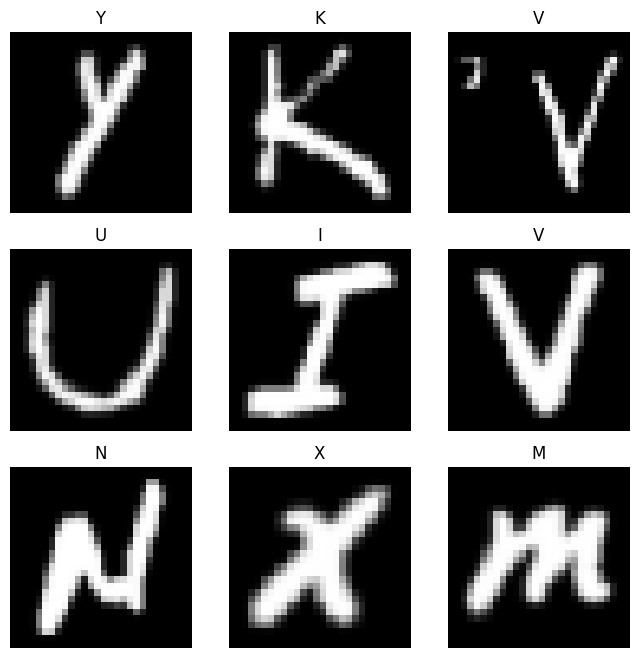

In [12]:
class_names = [chr(i) for i in range(ord('A'), ord('Z')+1)]

plt.figure(figsize=(8,8))
for images, labels in train_ds.take(1):
    for i in range(9):
        plt.subplot(3,3,i+1)
        plt.imshow(images[i].numpy().reshape(28,28), cmap='gray')
        plt.title(class_names[labels[i]])
        plt.axis('off')
plt.show()


In [13]:
model = models.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),
    layers.MaxPooling2D(2,2),

    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D(2,2),

    layers.Flatten(),
    layers.Dense(256, activation='relu'),
    layers.Dense(26, activation='softmax')
])

model.summary()


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)               │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 256)            │       409,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 26)             │         6,682 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 435,354 (1.66 MB)

 Trainable params: 435,354 (1.66 MB)

 Non-trainable params: 0 (0.00 B)

In [14]:
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)


In [15]:
history = model.fit(
    train_ds,
    epochs=10,
    validation_data=test_ds
)


Epoch 1/10
694/694 ━━━━━━━━━━━━━━━━━━━━ 104s 145ms/step - accuracy: 0.7047 - loss: 1.0117 - val_accuracy: 0.8831 - val_loss: 0.3627
Epoch 2/10
694/694 ━━━━━━━━━━━━━━━━━━━━ 97s 138ms/step - accuracy: 0.9071 - loss: 0.2805 - val_accuracy: 0.9059 - val_loss: 0.2845
Epoch 3/10
694/694 ━━━━━━━━━━━━━━━━━━━━ 141s 135ms/step - accuracy: 0.9271 - loss: 0.2139 - val_accuracy: 0.9122 - val_loss: 0.2627
Epoch 4/10
694/694 ━━━━━━━━━━━━━━━━━━━━ 93s 132ms/step - accuracy: 0.9378 - loss: 0.1785 - val_accuracy: 0.9156 - val_loss: 0.2469
Epoch 5/10
694/694 ━━━━━━━━━━━━━━━━━━━━ 95s 135ms/step - accuracy: 0.9444 - loss: 0.1546 - val_accuracy: 0.9201 - val_loss: 0.2385
Epoch 6/10
694/694 ━━━━━━━━━━━━━━━━━━━━ 92s 131ms/step - accuracy: 0.9493 - loss: 0.1379 - val_accuracy: 0.9232 - val_loss: 0.2376
Epoch 7/10
694/694 ━━━━━━━━━━━━━━━━━━━━ 146s 138ms/step - accuracy: 0.9556 - loss: 0.1191 - val_accuracy: 0.9207 - val_loss: 0.2477
Epoch 8/10
694/694 ━━━━━━━━━━━━━━━━━━━━ 137s 131ms/step - accuracy: 0.9591 - los

In [16]:
test_loss, test_acc = model.evaluate(test_ds)
print("Test Accuracy:", test_acc)


116/116 ━━━━━━━━━━━━━━━━━━━━ 5s 39ms/step - accuracy: 0.9189 - loss: 0.2609
Test Accuracy: 0.918310821056366


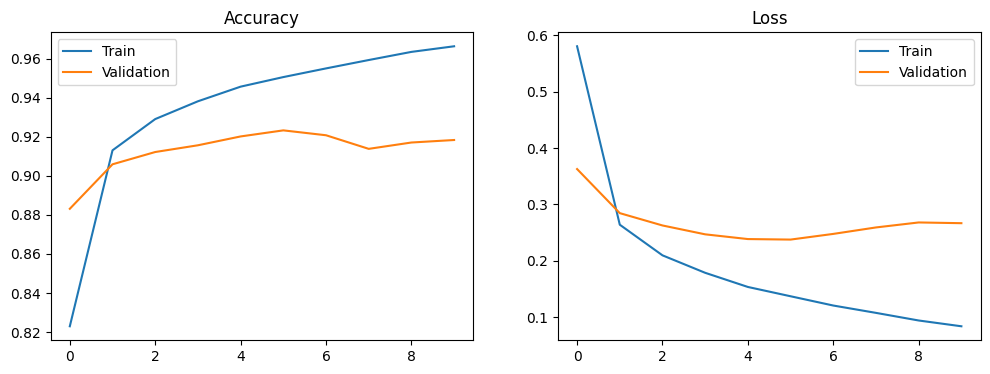

In [17]:
plt.figure(figsize=(12,4))

plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train')
plt.plot(history.history['val_accuracy'], label='Validation')
plt.legend()
plt.title("Accuracy")

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train')
plt.plot(history.history['val_loss'], label='Validation')
plt.legend()
plt.title("Loss")

plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 226ms/step


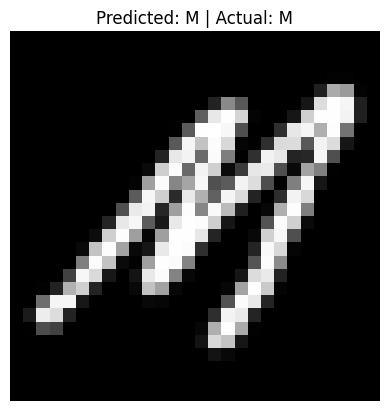

In [19]:
for images, labels in test_ds.take(1):
    sample = images[0]
    true_label = labels[0]

sample = tf.expand_dims(sample, axis=0)  # add batch dimension

prediction = model.predict(sample)
predicted_label = tf.argmax(prediction, axis=1)[0].numpy()

plt.imshow(sample[0].numpy().reshape(28,28), cmap='gray')
plt.title(f"Predicted: {class_names[predicted_label]} | Actual: {class_names[true_label]}")
plt.axis('off')
plt.show()


In [21]:
model.save("handwritten_character_recognition_AZ.h5")
from google.colab import files
files.download("handwritten_character_recognition_AZ.h5")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>